<a href="https://colab.research.google.com/github/Alirezanltv/image-to-vector-art/blob/Alireza_Kanani/convert_image_into_vector_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install potrace
# stackoverflow said to me
!pip install potracer
!pip install svgwrite
!pip install svgpathtools
!pip install networkx==2.5
!pip install cairosvg

In [6]:
import cv2
import potrace
import svgwrite
from svgpathtools import paths2svg

In [ ]:
image = cv2.imread('/content/bicycle.png')
# Specify the output SVG file path
output_file = '/content/bicycle.svg'
# image = cv2.medianBlur(image, 3)
edges = cv2.Canny(image, 100, 200)

bitmap = potrace.Bitmap(edges)
path = bitmap.trace()

# Create a new SVG drawing
dwg = svgwrite.Drawing(output_file)

# Convert potrace Path to SVG path data
path_data = ''
for curve in path:
    for segment in curve:
        if isinstance(segment, potrace.Curve):
            path_data += 'M {},{} L {},{} '.format(segment.start_point[0], segment.start_point[1],
                                                   segment.end_point[0], segment.end_point[1])
        elif isinstance(segment, potrace.BezierSegment):
            path_data += 'M {},{} C {},{}, {},{}, {},{} '.format(segment.c1.x, segment.c1.y,
                                                                 segment.c1.x, segment.c1.y,
                                                                 segment.c2.x, segment.c2.y,
                                                                 segment.end_point.x, segment.end_point.y)

# Add the path to the SVG drawing
dwg.add(dwg.path(d=path_data))

# Save the SVG drawing
dwg.save()


In [38]:
#@title sklearn approach

from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from PIL import Image
from skimage import io

path='/content/bicycle.png'
img = io.imread(path)

labels1 = segmentation.slic(img, compactness=50, n_segments=5000,
                        start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
out1 = Image.fromarray(out1, 'RGB')
out1.save('1.png')

In [7]:
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
imagemagick set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [24]:
!convert /content/bicycle.png /content/1.svg  

convert-im6.q16: missing an image filename `color' @ error/convert.c/ConvertImageCommand/3255.


In [39]:
!convert /content/1.png \
  -size 800x600 \
  -strokewidth 2 \
  -stroke black \
  -fill none \
  -blur 0x0.5 \
  /content/1.svg


In [ ]:
!convert -help

In [14]:
#@title with command line we can convert png image into svg image(gray)
!potrace -s /content/bicycle.pnm -o 2.svg


potrace: /content/bicycle.pnm: file format not recognized
Possible input file formats are: pnm (pbm, pgm, ppm), bmp.


In [10]:
#@title shortcut (Cartoon mode)
import cv2

img = cv2.imread('/content/bicycle.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

color = cv2.bilateralFilter(img, 9, 300, 300)
cartoon = cv2.bitwise_and(color, color, mask=edges)

cv2.imwrite('cartoon.jpg', cartoon)


True

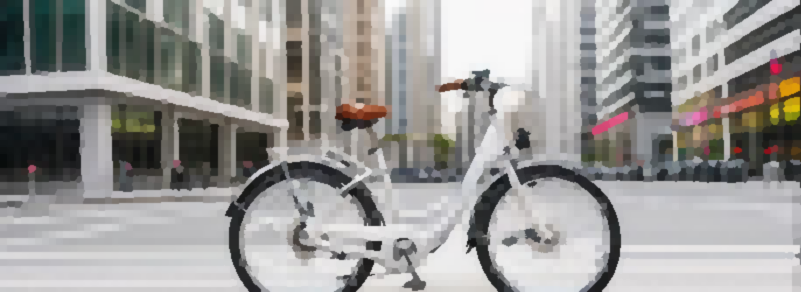

In [40]:
import IPython.display as display

# Specify the path to the SVG file
svg_file = "/content/1.svg"

# Display the SVG image
display.SVG(filename=svg_file)
